Airlines Dataset to predict a delay
Predicting flight delays is a common task in data science that involves analyzing various factors affecting flight schedules. To create a predictive model, you'll need a dataset that includes relevant features. Here’s a guide to constructing such a dataset and an outline of the potential data sources and features you might consider: Key Features for Predicting Flight Delays

Flight Information: Flight Number, Airline, Origin and Destination Airports, Scheduled and Actual Departure/Arrival Times.

Temporal Features:

Day of Week, Month, Season.

Weather Information:

Departure and Arrival Airport Weather.

Air Traffic Control Factors:

Air Traffic Volume, Runway Availability.

Operational Factors:

Aircraft Type, Crew Information.

Historical Delay Data:

Previous Delays, Delay Reasons

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df=pd.read_csv("Airlines.csv")

In [6]:
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [5]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [7]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [7]:
df.isnull()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [9]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\4053343116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)
C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\4053343116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)
C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\4053343116.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Delay', palette='Set2', data = df)


<Axes: xlabel='Delay', ylabel='count'>

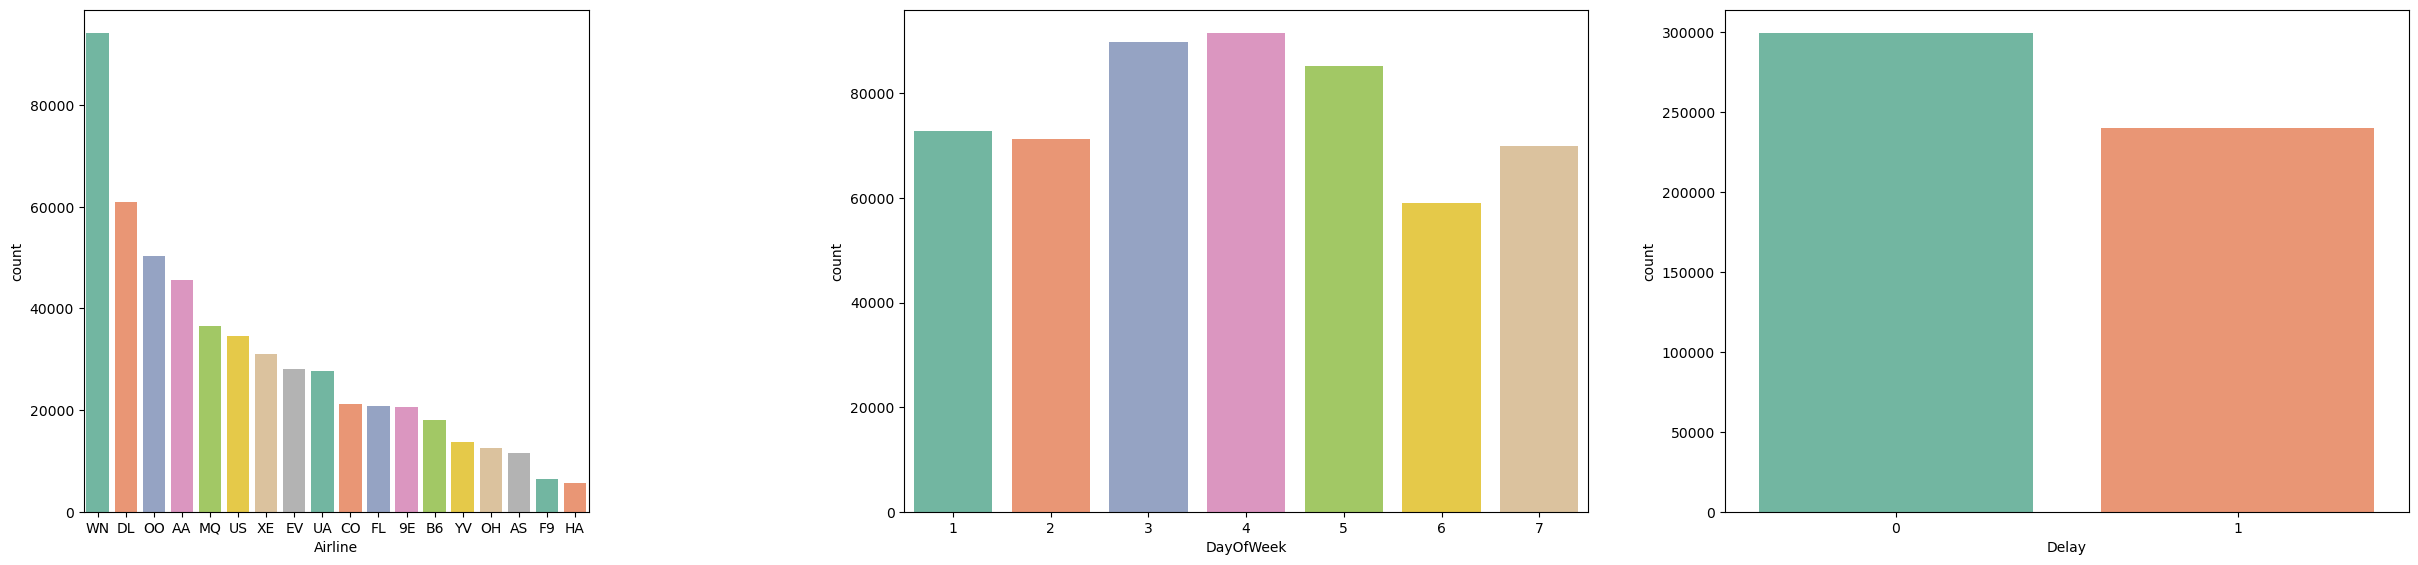

In [10]:
plt.figure(figsize=(30,30))
plt.subplot(4,4,1)
sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)

plt.subplot(4,3,2)
sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)

plt.subplot(4,3,3)
sns.countplot(x = 'Delay', palette='Set2', data = df)

C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\1267738161.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Time, kde = False)
C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\1267738161.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Length, kde = False)


<Axes: xlabel='Length'>

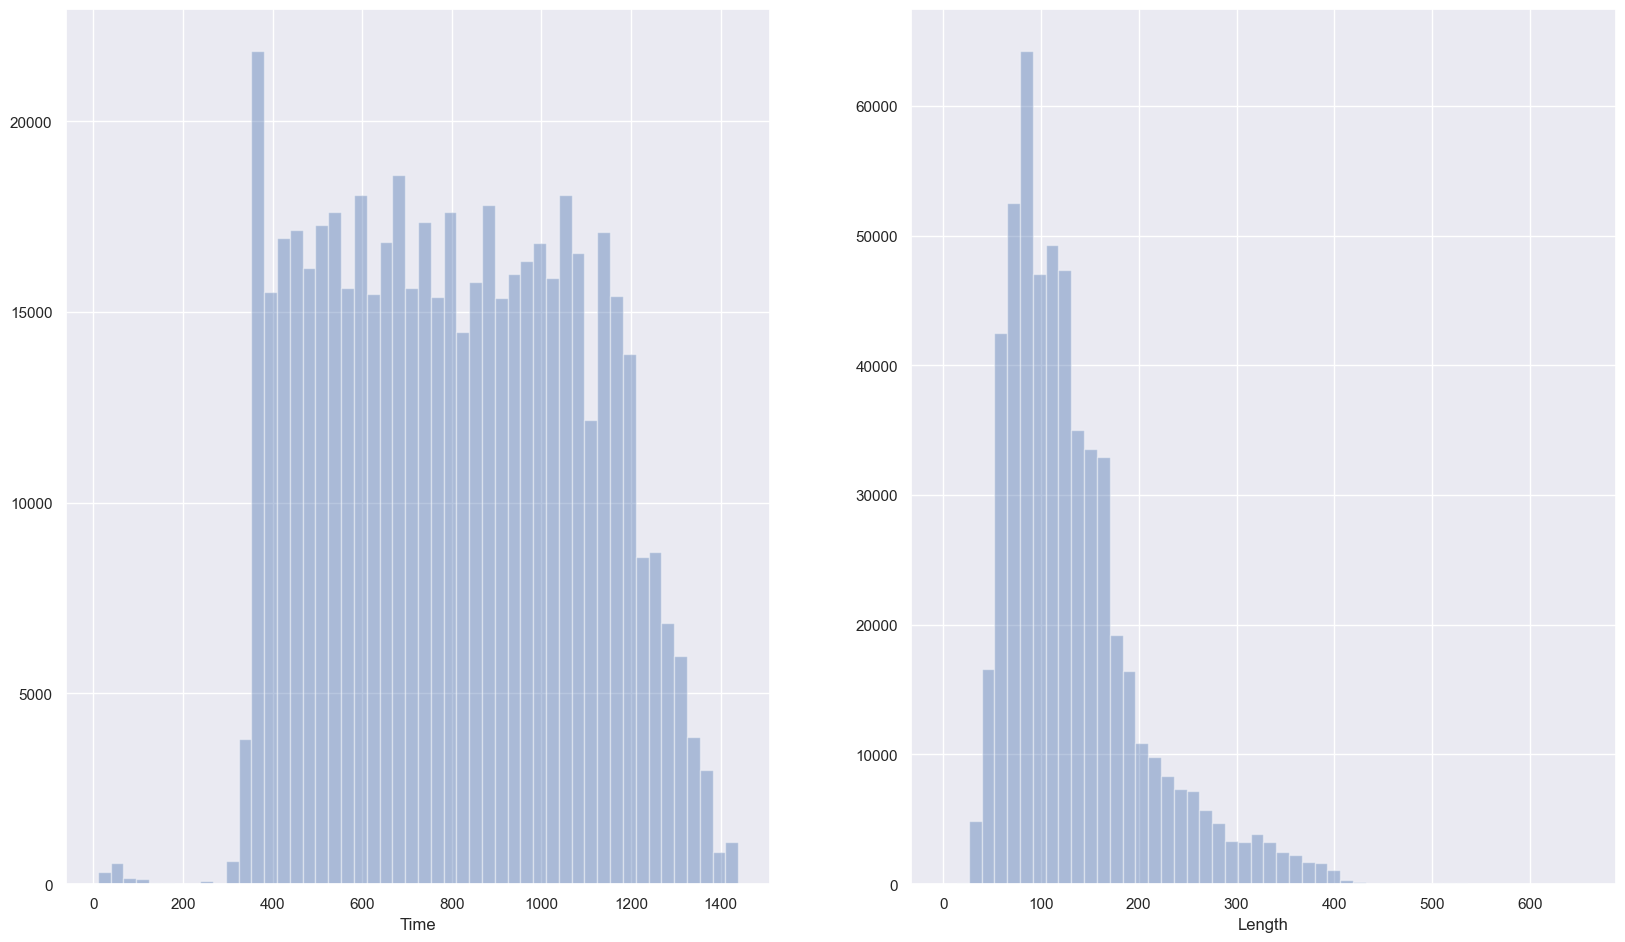

In [11]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df.Time, kde = False)

plt.subplot(2,2,2)
sns.distplot(df.Length, kde = False)

<Axes: xlabel='DayOfWeek', ylabel='count'>

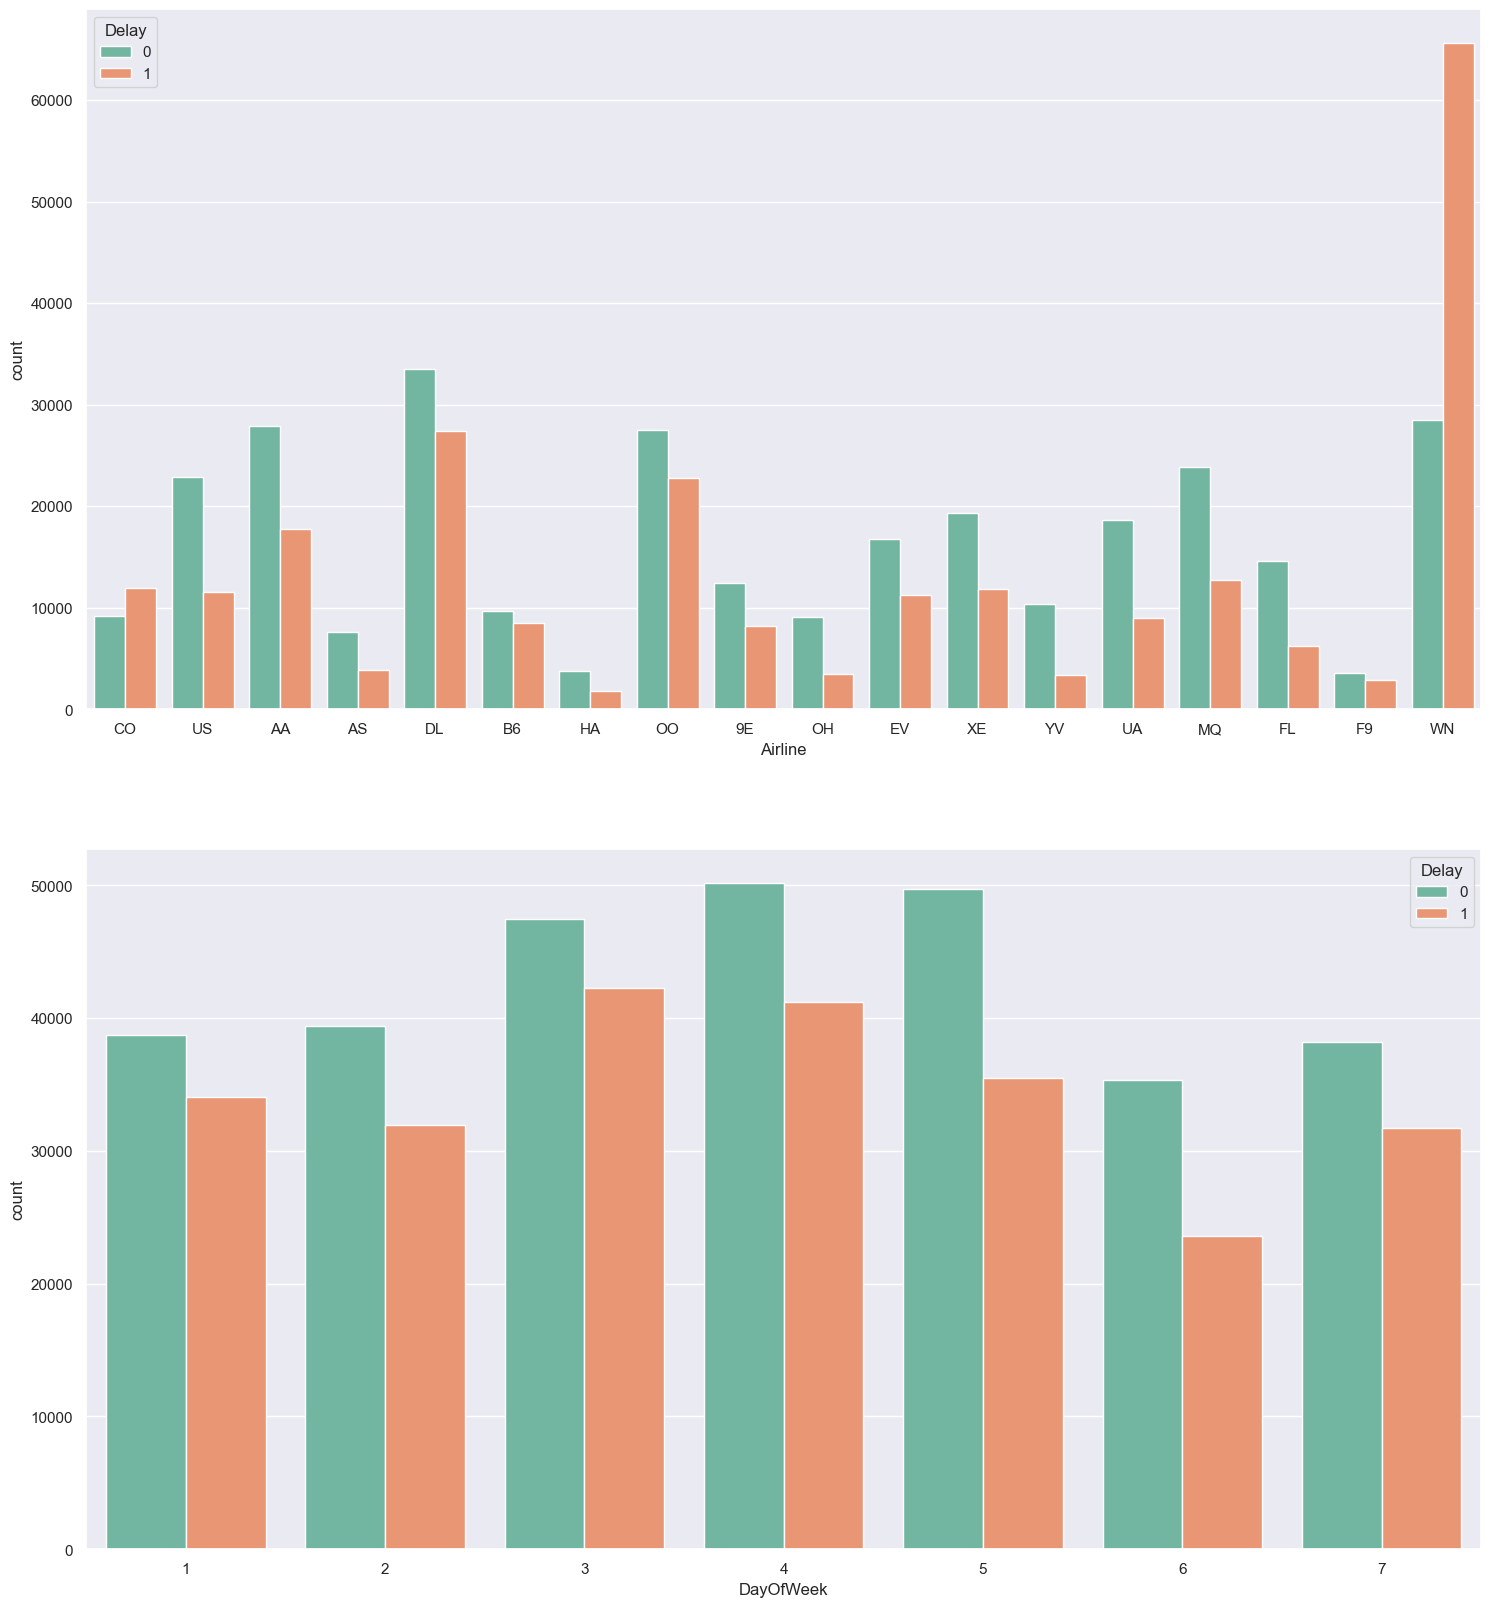

In [12]:
plt.figure(figsize = (18,20))

plt.subplot(2,1,1)
sns.countplot(x = 'Airline', hue= 'Delay', palette='Set2', data = df)

plt.subplot(2,1,2)
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='Set2', data = df)

C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\120358640.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Delay", y = "Time", palette = "Set2", data = df)


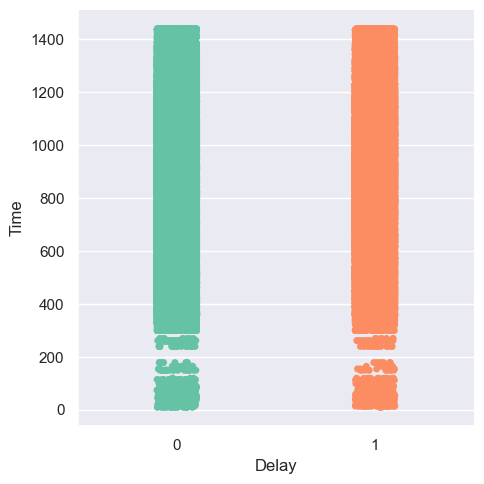

In [13]:
sns.catplot(x = "Delay", y = "Time", palette = "Set2", data = df)

C:\Users\SAKSHI PARATE\AppData\Local\Temp\ipykernel_12336\2076919715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Delay", y = "Length", palette = "Set2", data = df)


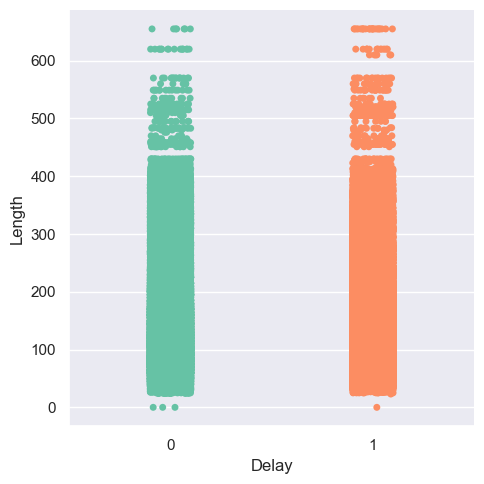

In [14]:
sns.catplot(x = "Delay", y = "Length", palette = "Set2", data = df)

In [15]:
df.drop(columns=['id'], inplace=True)

In [16]:
cols = df.columns
for i in range(0,len(cols)):
    print(df[cols[i]].value_counts(),'\n')
    print('********************************************\n')

Airline
WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: count, dtype: int64 

********************************************

Flight
16      420
5       407
9       401
8       396
62      364
       ... 
3518      1
3455      1
3349      1
3413      1
3184      1
Name: count, Length: 6585, dtype: int64 

********************************************

AirportFrom
ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64 

********************************************

AirportTo
ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: count, Length: 293, dtype: int64 

***************************************

In [17]:
le = preprocessing.LabelEncoder()

df['Airline'] = le.fit_transform(df['Airline'])
df['AirportFrom'] = le.fit_transform(df['AirportFrom'])
df['AirportTo'] = le.fit_transform(df['AirportTo'])

In [18]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,4,178,203,264,5,1439,326,0
539379,8,398,252,16,5,1439,305,0
539380,8,609,253,184,5,1439,255,0
539381,13,78,128,253,5,1439,313,1


In [19]:
df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Airline      539383 non-null  int64
 1   Flight       539383 non-null  int64
 2   AirportFrom  539383 non-null  int64
 3   AirportTo    539383 non-null  int64
 4   DayOfWeek    539383 non-null  int64
 5   Time         539383 non-null  int64
 6   Length       539383 non-null  int64
 7   Delay        539383 non-null  int64
dtypes: int64(8)
memory usage: 32.9 MB


In [21]:
df.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,9.334527,2427.928630,144.116322,144.143162,3.929668,802.728963,132.202007,0.445442
std,5.306368,2067.429837,79.379776,79.353137,1.914664,278.045911,70.117016,0.497015
min,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,5.000000,712.000000,79.000000,79.000000,2.000000,565.000000,81.000000,0.000000
50%,10.000000,1809.000000,153.000000,153.000000,4.000000,795.000000,115.000000,0.000000
75%,15.000000,3745.000000,208.000000,208.000000,5.000000,1035.000000,162.000000,1.000000
max,17.000000,7814.000000,292.000000,292.000000,7.000000,1439.000000,655.000000,1.000000


In [22]:
df.isnull()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False


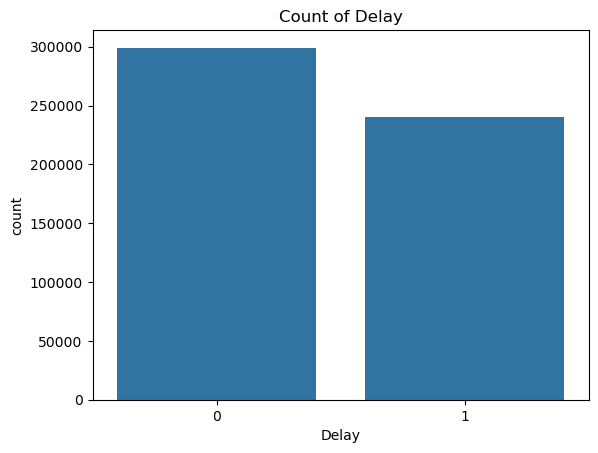

In [7]:
sns.countplot(x='Delay', data=df)
plt.title('Count of Delay')
plt.show()

<Axes: xlabel='Time', ylabel='Count'>

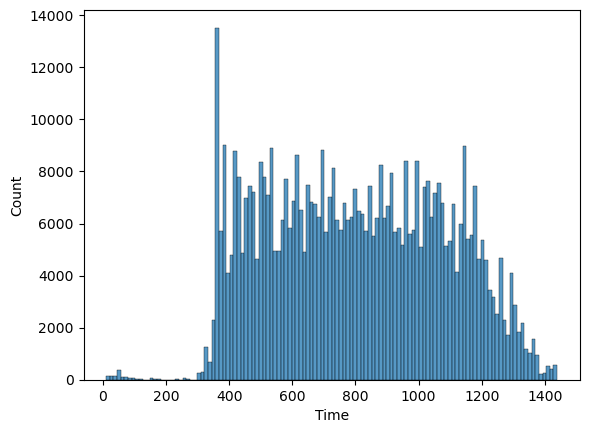

In [8]:
sns.histplot(df['Time'])

<Axes: xlabel='Length', ylabel='Count'>

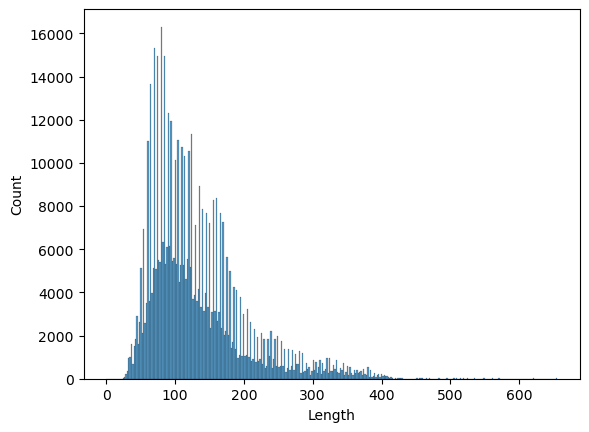

In [9]:
sns.histplot(df['Length'])

In [10]:
df['Length_by_hours'] = df['Length'] / 60
df['Time_by_hour'] = df['Time'] / 60

In [11]:
df.drop(columns=['Length', 'Time'], inplace=True)

<Axes: xlabel='Time_by_hour', ylabel='Count'>

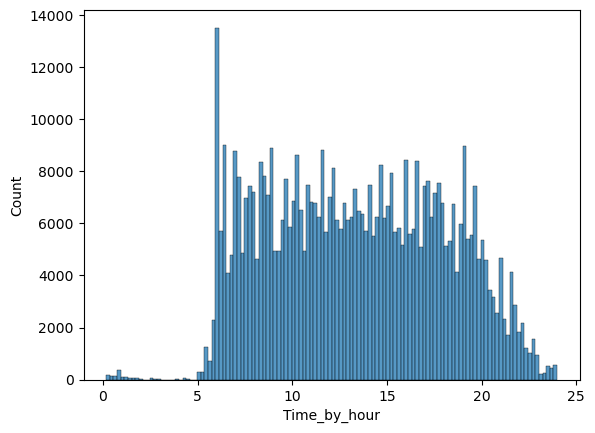

In [12]:
sns.histplot(df['Time_by_hour'])

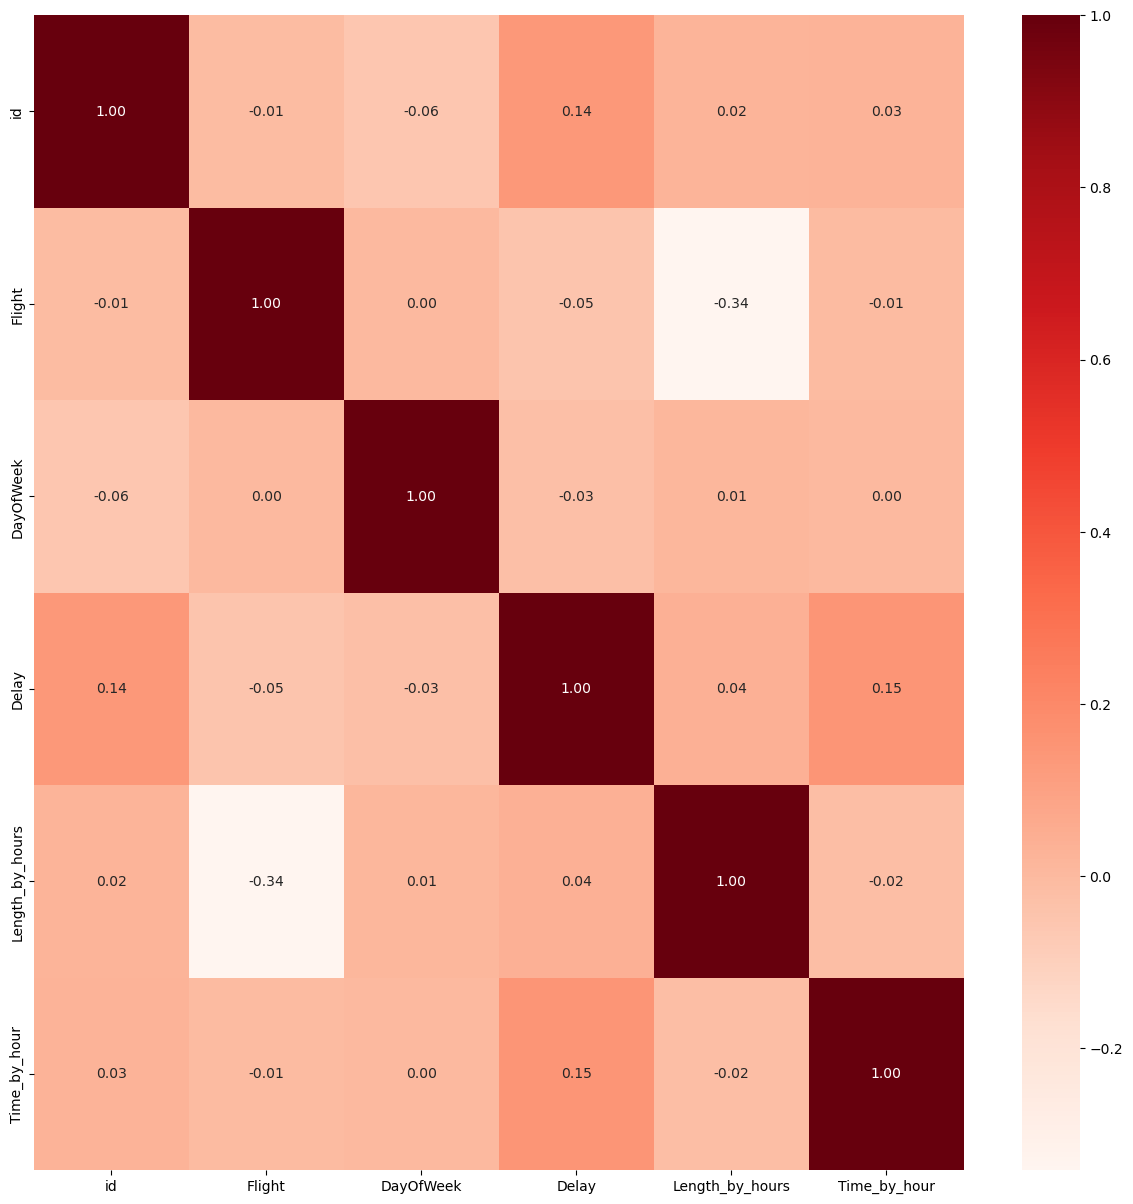

In [14]:
plt.figure(figsize=(15, 15))

cor = df.select_dtypes(include='number').corr()

sns.heatmap(cor, annot=True, cmap='Reds', fmt='.2f')
plt.show()